# Gaussian Mixture Clustering

In [1]:
import sys
sys.path.append("./../my-staff")
from database import load_ds
from utils import normalize
from globals import SEED
from clustering import interpret_cluster, show_clusters
from sklearn.mixture import GaussianMixture


In [2]:
X, y, features_names, class_names = load_ds("clustering")

In [3]:
X_norm = normalize(X)

# Tests

In [4]:
import numpy as np
from sklearn.datasets import make_blobs


# Create some sample data
data, labels = make_blobs(n_samples=300, centers=3, random_state=42)

# Define the number of components (clusters)
gmm = GaussianMixture(n_components=3)

# Fit the data to the GMM model
gmm.fit(data)

# Get cluster labels and probabilities
labels = gmm.predict(data)
probs = gmm.predict_proba(data)

print("Cluster labels:", labels)
print("Cluster probabilities:", probs)


Cluster labels: [1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]
Cluster probabilities: [[5.79506157e-67 1.00000000e+00 1.35999675e-60]
 [1.36438005e-64 1.00000000e+00 3.14154567e-60]
 [1.00000000e+00 2.05865579e-51 1.72369478e-15]
 [8.23076192e-24 1.71564500e-45 1.00000000e+00]
 [1.20447754e-71 1.00000000e+00 9.85406873e-70]
 [7.86374676e-33 5.35909457e-46 1.00000000e+00]
 [1.00000000e+00 6.62024106e-62 1.28187028e-22]
 [4.03172216e-3

In [5]:
import matplotlib.pyplot as plt


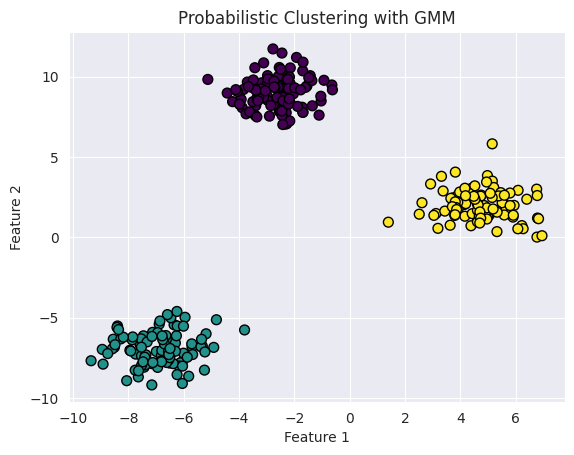

In [6]:
# Visualize the data points and probability contours
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Probabilistic Clustering with GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


Min probability: 3.7576996085397974e-34 Max probability: 0.06175090721680559


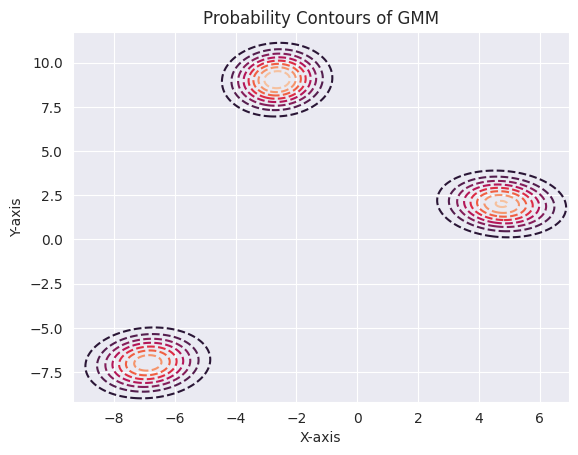

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create meshgrid
x, y = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 300),
                   np.linspace(data[:, 1].min(), data[:, 1].max(), 300))
zz = np.column_stack((x.ravel(), y.ravel()))

# Calculate probabilities
log_prob = gmm.score_samples(zz)
prob = np.exp(log_prob)

# Check some probability values
print("Min probability:", prob.min(), "Max probability:", prob.max())

# Reshape and plot
prob = prob.reshape(x.shape)
plt.contour(x, y, prob, levels=np.linspace(prob.min(), prob.max(), 10), linestyles='dashed')
plt.title("Probability Contours of GMM")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

The densest part of each group, indicated by the innermost contour lines, represents the region where the data points are most likely to be found, according to the model. This is where the mean of the Gaussian distribution for each component of the mixture would likely be located. As the contours expand outward, the probability decreases, indicating that data points are less likely to be found further from the center.

The colors seem to indicate different levels of probability density, with warmer colors (like yellow) representing higher probabilities and cooler colors (like blue) representing lower probabilities.

The plot is useful for understanding the distribution of data in two dimensions and how the GMM is representing this distribution with its components. It can be used to visualize how well the GMM fits the data and to identify regions of high probability or high uncertainty.

In [8]:

data = np.random.randn(300, 2)
print(data)


[[-5.77897839e-01  4.36688144e-01]
 [ 5.91055338e-01 -1.82234700e-02]
 [-7.93247587e-01 -2.90887110e-01]
 [ 5.35313016e-01 -1.96321892e+00]
 [-1.03548789e+00 -1.87895027e-01]
 [-6.21571104e-01  1.10185782e-01]
 [-2.76220079e+00  5.36875537e-01]
 [-4.51840050e-01  6.26565447e-01]
 [ 2.71268642e-01  1.45786539e+00]
 [-3.83924302e-01  7.32324444e-02]
 [-4.04981823e-02 -1.30267236e+00]
 [ 5.05378211e-01  1.78328127e+00]
 [ 1.41385594e+00  8.29760906e-01]
 [ 9.30060298e-02 -8.06276906e-01]
 [ 4.60723931e-01  2.33782384e-02]
 [ 7.39938246e-01 -8.13944949e-01]
 [-7.05773712e-01 -1.46637468e-01]
 [ 1.07897808e-02  1.66553810e-02]
 [ 1.15284594e+00 -1.08240933e+00]
 [-2.20783767e+00 -3.36504655e-01]
 [ 6.01515957e-01 -2.29037539e-01]
 [ 8.48375954e-01  1.14178264e+00]
 [ 1.10535673e+00 -3.05586908e-01]
 [-5.61828664e-01  3.52677449e-01]
 [-4.03637758e-01  1.04290957e+00]
 [ 1.14273863e+00 -1.26458368e+00]
 [-2.50404508e-01  8.04426322e-01]
 [-6.77725102e-01  4.42737854e-01]
 [-5.67996266e-01 -1

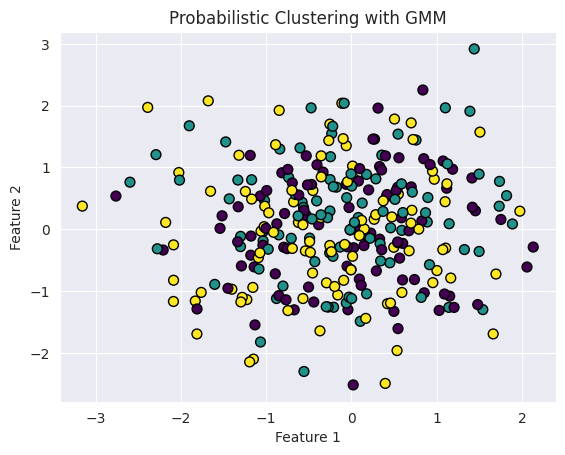

In [9]:
# Visualize the data points and probability contours
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Probabilistic Clustering with GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


Min probability: 1.7426943754646703e-05 Max probability: 0.1588068786655595


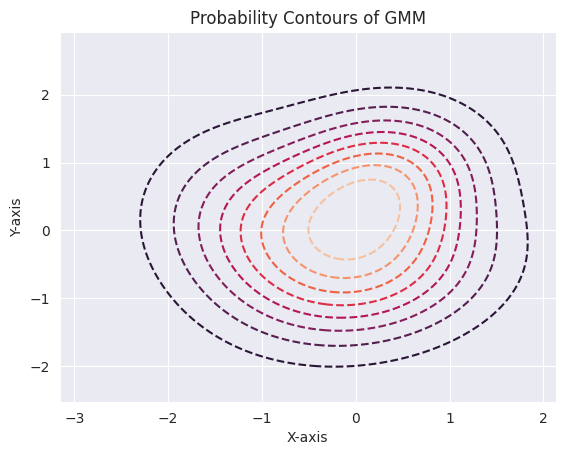

In [10]:
# Fit GMM (replace with your GMM fitting process)
gmm = GaussianMixture(n_components=3, random_state=0).fit(data)
# Create meshgrid
x, y = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 300),
                   np.linspace(data[:, 1].min(), data[:, 1].max(), 300))
zz = np.column_stack((x.ravel(), y.ravel()))

# Calculate probabilities
log_prob = gmm.score_samples(zz)
prob = np.exp(log_prob)

# Check some probability values
print("Min probability:", prob.min(), "Max probability:", prob.max())

# Reshape and plot
prob = prob.reshape(x.shape)
plt.contour(x, y, prob, levels=np.linspace(prob.min(), prob.max(), 10), linestyles='dashed')
plt.title("Probability Contours of GMM")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Real Data


In [11]:
def gaussinMixture_show(k, df, df_norm):
    gmm = GaussianMixture(n_components=k, random_state=SEED)

    gmm.fit(df_norm)

    labels = gmm.predict(df_norm)

    interpret_cluster(df, labels)

    show_clusters(df_norm, labels)

    return df, labels

## k=3

Métricas de evaluación:
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


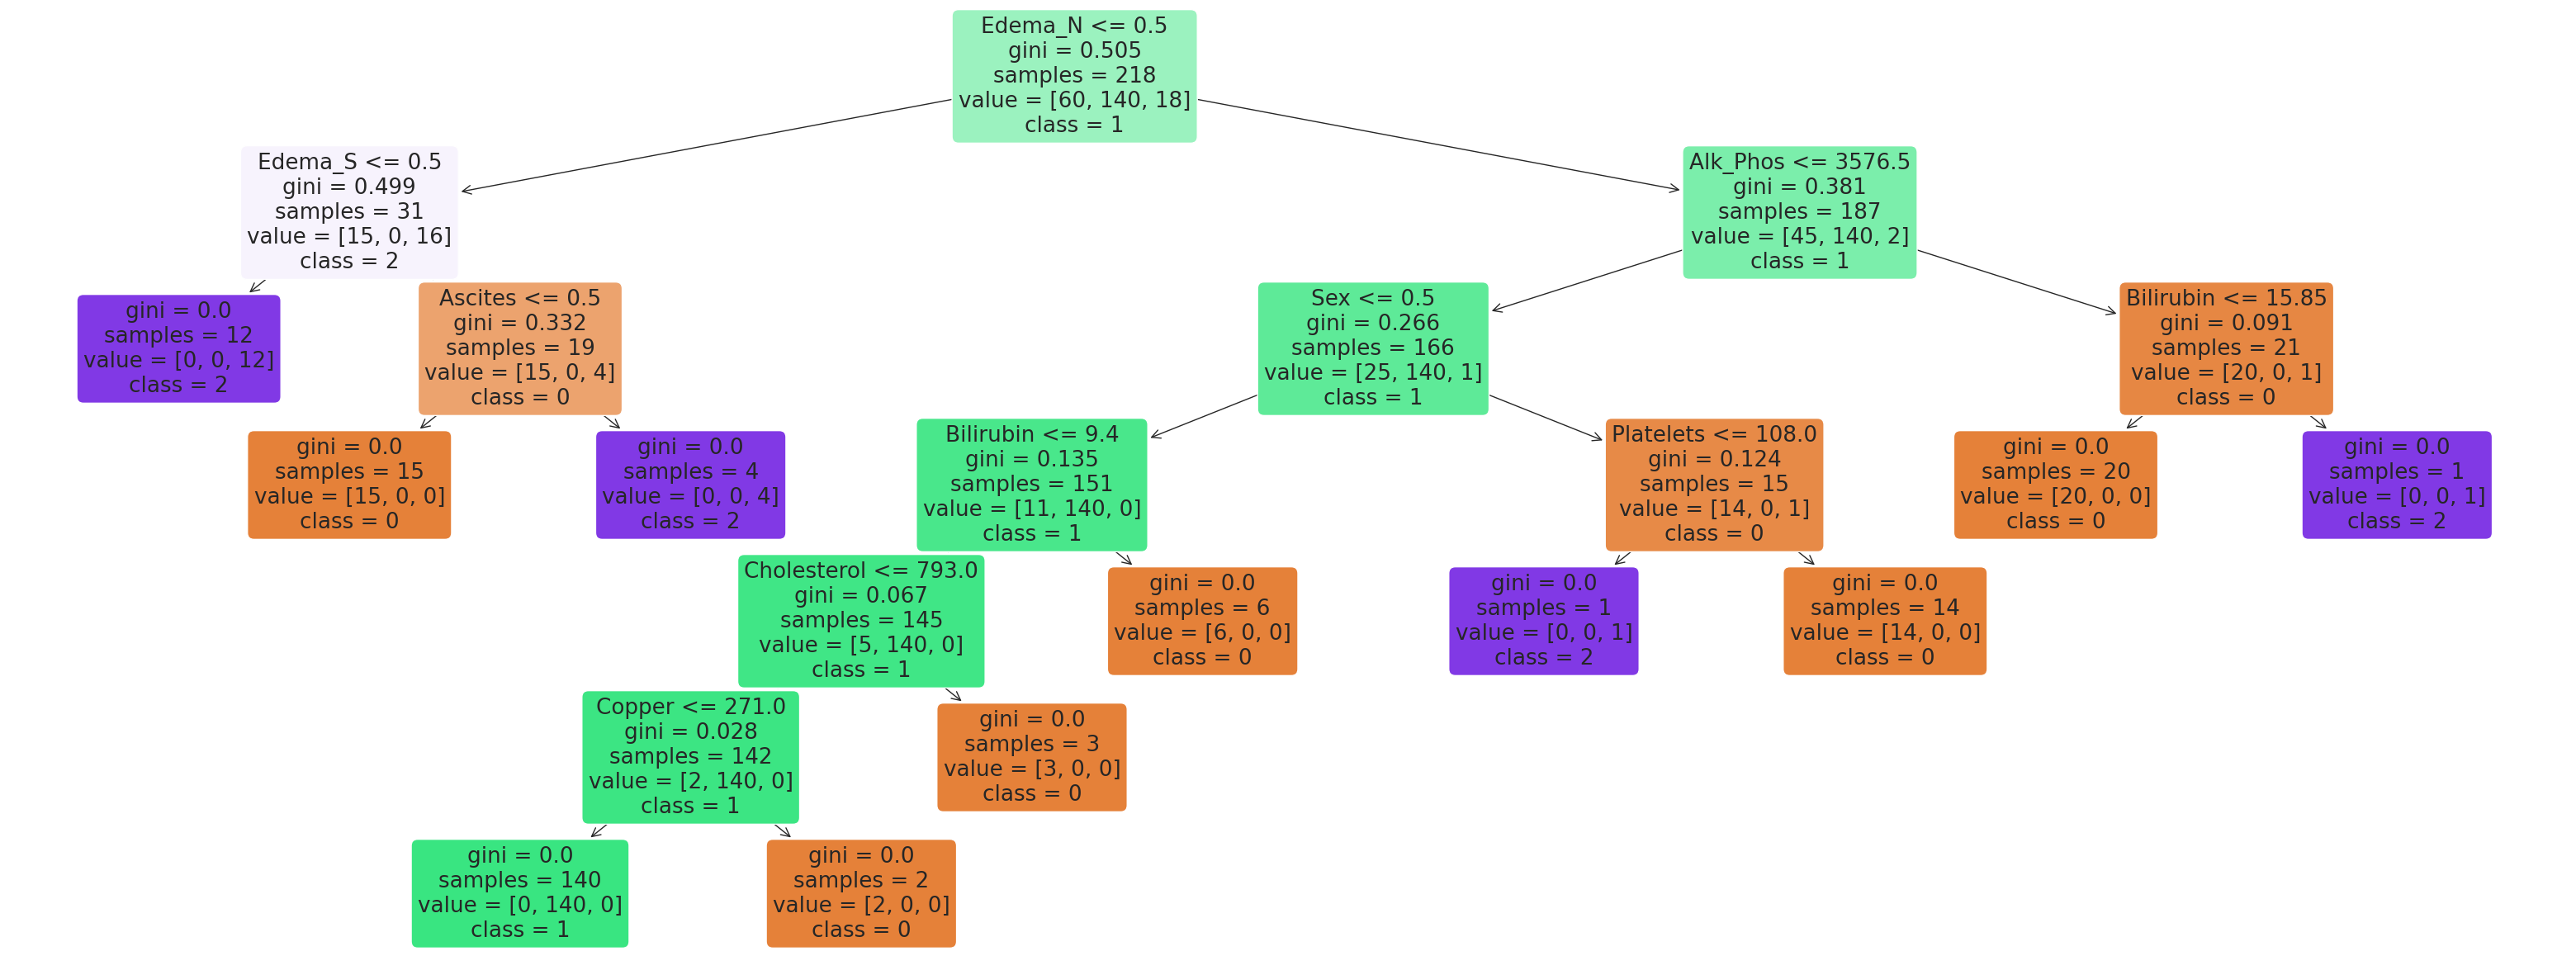

(312, 2)


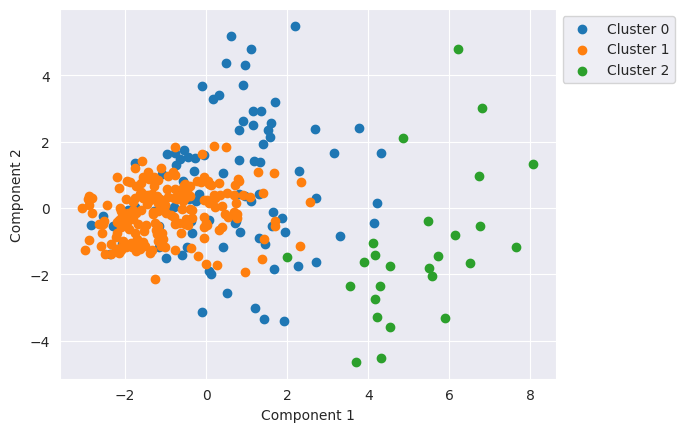

In [12]:
df, labels = gaussinMixture_show(3, X, X_norm)

In [13]:
df["Cluster"] = labels

In [19]:
cluster_0 = df[df['Cluster'] == 0]
print(len(cluster_0))

92


In [20]:
cluster_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N_Days,92.0,2069.021739,1292.185541,71.000000,1009.000000,1754.500000,2884.000000,4556.000000
Drug,92.0,0.500000,0.502740,0.000000,0.000000,0.500000,1.000000,1.000000
Age,92.0,51.161108,11.057083,30.884932,43.000685,50.427397,59.106164,75.063014
Sex,92.0,0.347826,0.478890,0.000000,0.000000,0.000000,1.000000,1.000000
Ascites,92.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hepatomegaly,92.0,0.641304,0.482246,0.000000,0.000000,1.000000,1.000000,1.000000
Spiders,92.0,0.304348,0.462652,0.000000,0.000000,0.000000,1.000000,1.000000
Bilirubin,92.0,4.620652,5.383523,0.300000,1.100000,2.300000,6.025000,28.000000
Cholesterol,92.0,474.321456,343.421981,176.000000,268.750000,365.255282,502.000000,1775.000000
Albumin,92.0,3.535000,0.365776,2.540000,3.337500,3.535000,3.830000,4.300000


In [25]:
cluster_1 = df[df['Cluster'] == 1]
print(len(cluster_1))

194


In [26]:
cluster_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N_Days,194.0,2157.149485,949.548201,186.00000,1433.500000,2105.500000,2771.250000,4365.000000
Drug,194.0,0.494845,0.501267,0.00000,0.000000,0.000000,1.000000,1.000000
Age,194.0,48.587403,9.872105,26.29589,40.846575,48.646575,56.173288,70.052055
Sex,194.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Ascites,194.0,0.020619,0.142471,0.00000,0.000000,0.000000,0.000000,1.000000
Hepatomegaly,194.0,0.412371,0.493535,0.00000,0.000000,0.000000,1.000000,1.000000
Spiders,194.0,0.226804,0.419848,0.00000,0.000000,0.000000,0.000000,1.000000
Bilirubin,194.0,1.671649,1.491346,0.30000,0.700000,1.100000,2.100000,8.000000
Cholesterol,194.0,324.542217,94.266373,120.00000,256.000000,317.000000,372.000000,636.000000
Albumin,194.0,3.593763,0.381039,1.96000,3.370000,3.600000,3.827500,4.640000


In [22]:
cluster_2 = df[df['Cluster'] == 2]
print(len(cluster_2))

26


In [23]:
cluster_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N_Days,26.0,659.538462,761.822879,41.000000,149.750000,341.000000,1136.000000,3428.000000
Drug,26.0,0.461538,0.508391,0.000000,0.000000,0.000000,1.000000,1.000000
Age,26.0,57.070811,11.176772,37.608219,47.244521,56.132877,65.060959,78.493151
Sex,26.0,0.153846,0.367946,0.000000,0.000000,0.000000,0.000000,1.000000
Ascites,26.0,0.769231,0.429669,0.000000,1.000000,1.000000,1.000000,1.000000
Hepatomegaly,26.0,0.807692,0.401918,0.000000,1.000000,1.000000,1.000000,1.000000
Spiders,26.0,0.692308,0.470679,0.000000,0.000000,1.000000,1.000000,1.000000
Bilirubin,26.0,10.250000,7.446140,0.800000,3.600000,7.800000,17.175000,24.500000
Cholesterol,26.0,334.174296,231.694127,151.000000,191.750000,252.000000,369.510563,1092.000000
Albumin,26.0,2.916538,0.404514,2.100000,2.610000,2.995000,3.205000,3.670000


## k=5

/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Métricas de evaluación:
Precision: 0.9574
Recall: 0.9468
F1-score: 0.9518


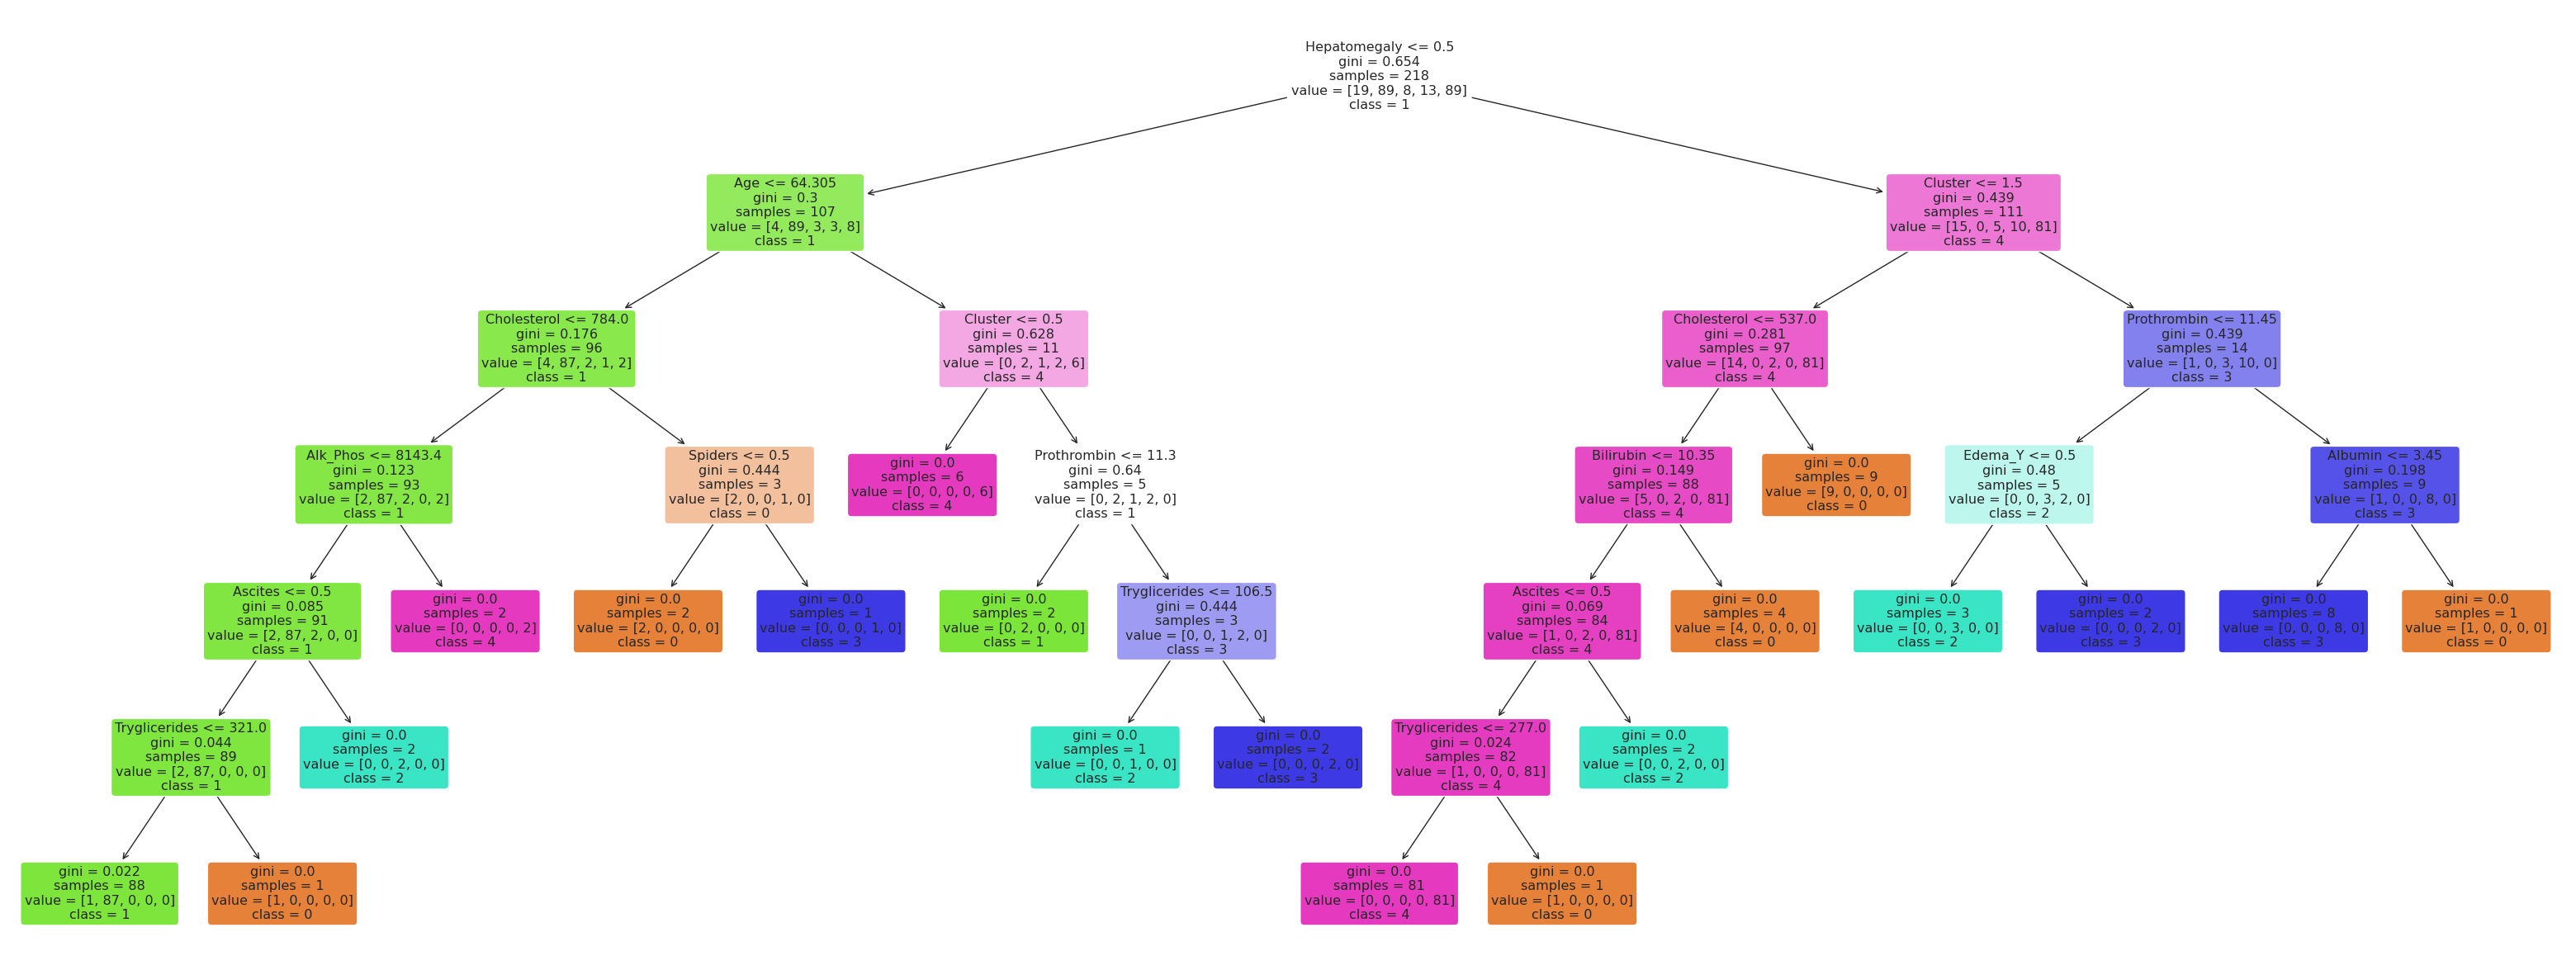

(312, 2)


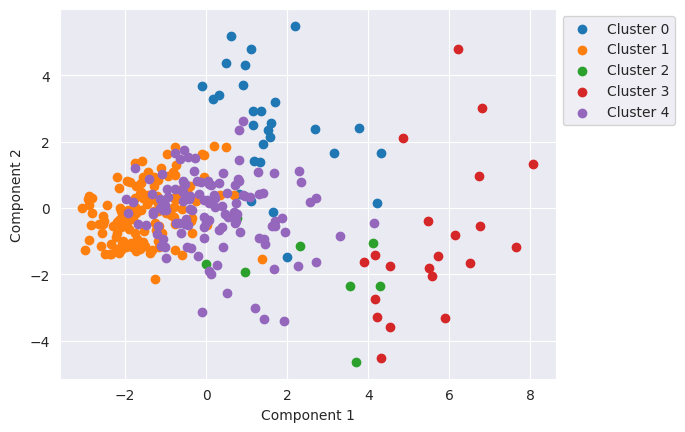

In [18]:
df, labels = gaussinMixture_show(5, X, X_norm)
